TensorFlow is an end-to-end open-source deep learning framework developed by Google and released in 2015. It is known for documentation and training support, scalable production and deployment options, multiple abstraction levels, and support for different platforms, such as Android.

With this example we will classify images of clothing, like sneakers and shirts and we will use tf.keras, a high-level API to build and train models in TensorFlow.

In [116]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import random

#remember to set the random seed to have reproducible results!
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

print(tf.__version__)

2.7.0-rc1


This example uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels)

In [117]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's explore our dataset! 
In the training set is we have 60000 images with 28x28 dimension

In [4]:
print('Trainining set: ',train_images.shape)

Trainining set:  (60000, 28, 28)


We have 60000 labels as well, and the training labels are integer between 0 and 9 (10 in total as the number of classes)

In [5]:
print('Trainining labels: ', len(train_labels))

Trainining labels:  60000


In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

The test sample has 10000 images with 28x28 dimension

In [7]:
print('Test set: ', test_images.shape)

Test set:  (10000, 28, 28)


We have 10000 labels as well, and the training labels are integer between 0 and 9 (10 in total as the number of classes)

In [8]:
print('Test labels: ', len(test_labels))

Test labels:  10000


Data needs to be prepocessed before being used in the training.\\
If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

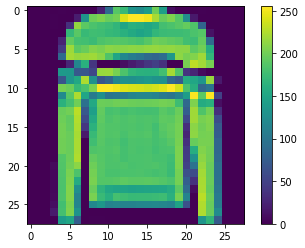

In [9]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

Before starting the training it's important to normalize the input to 1 by dividing the training and the test set to 255

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

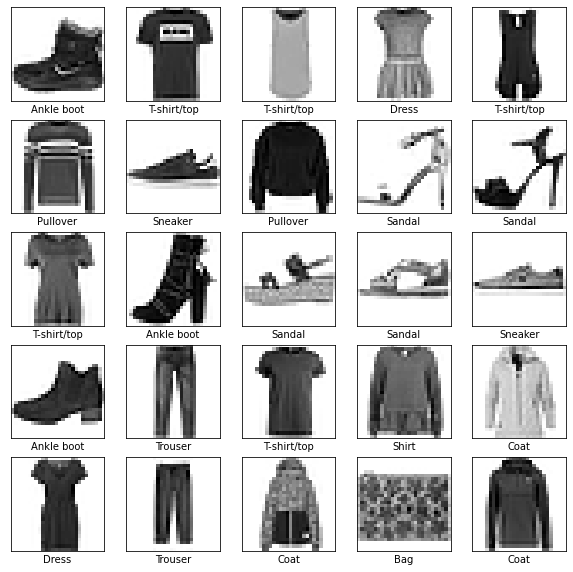

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Building the model with DNN

In [12]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([

    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2, input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(.2, input_shape=(28,28)),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dropout(.2, input_shape=(28,28)),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(10)
])

2022-11-13 20:40:28.379246: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (34)
2022-11-13 20:40:28.379301: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:163] no NVIDIA GPU device is present: /dev/nvidia0 does not exist
2022-11-13 20:40:28.379576: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of several tf.keras.layers.Dense layers with a Dropout layer in between. 
Below we visualise the model:

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               12900     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 80)                8080      
                                                                 
 dropout_2 (Dropout)         (None, 80)                0

## Compile and Fit the model

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data.
We'll call the EarlyStopping instance to prevent from overtraing

In [15]:
batch_size =  200
epochs = 50

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=10, verbose=1, mode='auto')

history = model.fit(train_images, 
                    train_labels, 
                    validation_split = 0.1,#0.1 
                    batch_size = batch_size, 
                    callbacks = [earlystop], 
                    epochs=epochs)

Epoch 1/50
270/270 [==============================] - 2s 5ms/step - loss: 0.7766 - accuracy: 0.7154 - val_loss: 0.4479 - val_accuracy: 0.8398
Epoch 2/50
270/270 [==============================] - 1s 4ms/step - loss: 0.4774 - accuracy: 0.8292 - val_loss: 0.3922 - val_accuracy: 0.8555
Epoch 3/50
270/270 [==============================] - 1s 4ms/step - loss: 0.4236 - accuracy: 0.8483 - val_loss: 0.3782 - val_accuracy: 0.8652
Epoch 4/50
270/270 [==============================] - 1s 4ms/step - loss: 0.3949 - accuracy: 0.8573 - val_loss: 0.3494 - val_accuracy: 0.8733
Epoch 5/50
270/270 [==============================] - 1s 4ms/step - loss: 0.3790 - accuracy: 0.8627 - val_loss: 0.3472 - val_accuracy: 0.8703
Epoch 6/50
270/270 [==============================] - 1s 4ms/step - loss: 0.3616 - accuracy: 0.8701 - val_loss: 0.3558 - val_accuracy: 0.8720
Epoch 7/50
270/270 [==============================] - 1s 4ms/step - loss: 0.3459 - accuracy: 0.8749 - val_loss: 0.3381 - val_accuracy: 0.8758
Epoch 

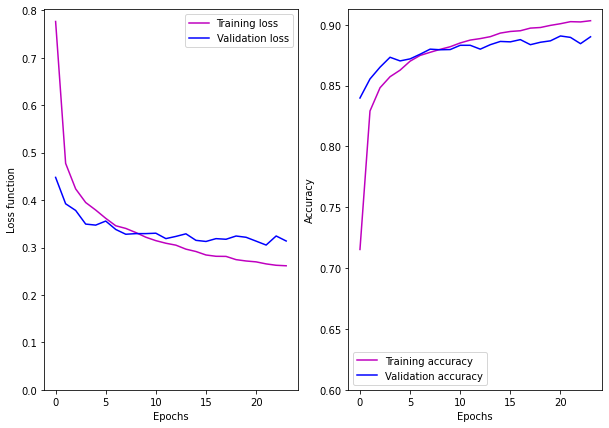

In [16]:
# plot training results (loss and accuracy vs epoch)
plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],color='m',label='Training loss')
plt.plot(history.history['val_loss'],color='b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.ylim(ymin = 0.0)
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],color='m',label='Training accuracy')
plt.plot(history.history['val_accuracy'],color='b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(ymin = 0.6)
plt.legend()

## Performances of the model on data

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3253 - accuracy: 0.8879 - 476ms/epoch - 2ms/step

Test accuracy: 0.8878999948501587


In [18]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [20]:
predictions[5]

array([1.1837339e-09, 1.0000000e+00, 7.3396178e-10, 3.0438296e-09,
       1.7240218e-09, 4.9290634e-17, 7.1784489e-10, 4.9818958e-18,
       9.0887254e-12, 5.3924759e-16], dtype=float32)

In [21]:
np.argmax(predictions[5])

1

In [22]:
test_labels[5]

1

Graph this to look at the full set of 10 class predictions.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#7777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.


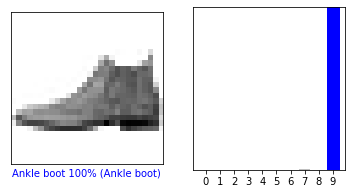

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

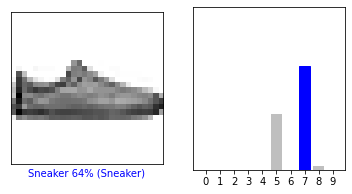

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

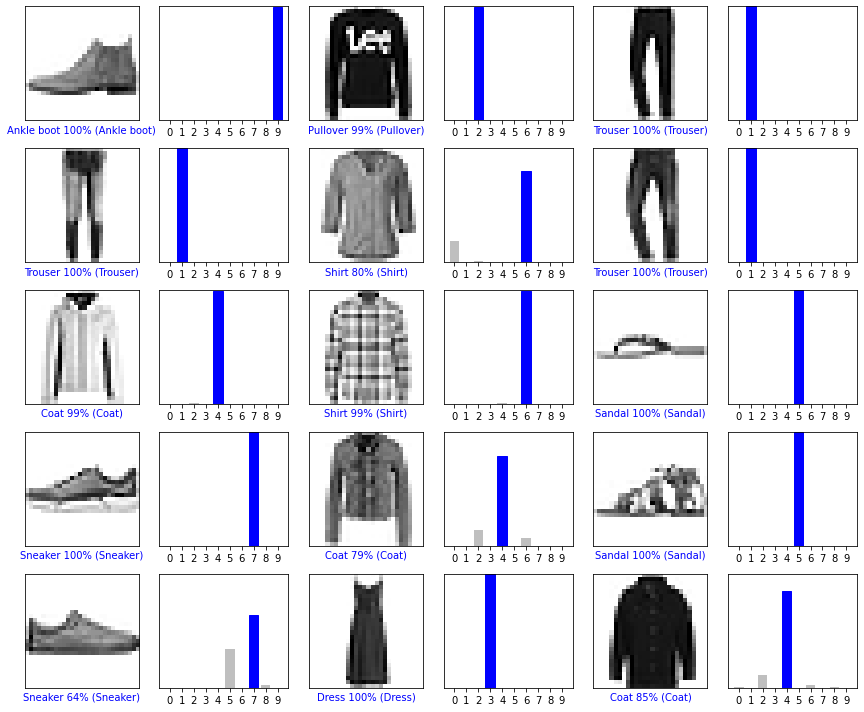

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Single image prediction

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.9814078e-04 5.0207859e-08 9.9410689e-01 3.4578500e-07 2.2110324e-03
  1.9159204e-08 3.4832212e-03 9.2185579e-11 2.4255988e-07 5.1472326e-10]]


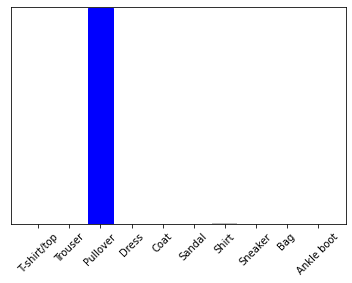

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

tf.keras.Model.predict returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [31]:
np.argmax(predictions_single[0])

2

## Repeat the exercise with a CNN

In [107]:
from tensorflow.keras import datasets, layers, models

tf.keras.utils.set_random_seed(42)

model_cnn = models.Sequential()
model_cnn.add(layers.Conv1D(64, 3, activation='relu', input_shape=(28, 28)))#64
model_cnn.add(layers.Conv1D(32, 3, activation='relu'))#32
model_cnn.add(layers.Conv1D(32, 3, activation='relu'))#32
model_cnn.add(layers.Flatten())
model_cnn.add(layers.Dense(32, activation='relu'))
model_cnn.add(layers.Dense(10))

In [108]:
model_cnn.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_28 (Conv1D)          (None, 26, 64)            5440      
                                                                 
 conv1d_29 (Conv1D)          (None, 24, 32)            6176      
                                                                 
 conv1d_30 (Conv1D)          (None, 22, 32)            3104      
                                                                 
 flatten_9 (Flatten)         (None, 704)               0         
                                                                 
 dense_21 (Dense)            (None, 32)                22560     
                                                                 
 dense_22 (Dense)            (None, 10)                330       
                                                                 
Total params: 37,610
Trainable params: 37,610
Non-tra

In [109]:
model_cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

batch_size =  200
epochs = 50

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=10, verbose=1, mode='auto')

history_cnn = model_cnn.fit(train_images, 
                    train_labels,
                    batch_size = batch_size, 
                    callbacks = [earlystop],
                    validation_split = 0.1,
                    epochs=epochs)

Epoch 1/50
270/270 [==============================] - 2s 6ms/step - loss: 0.7112 - accuracy: 0.7460 - val_loss: 0.4892 - val_accuracy: 0.8220
Epoch 2/50
270/270 [==============================] - 2s 6ms/step - loss: 0.4449 - accuracy: 0.8400 - val_loss: 0.4222 - val_accuracy: 0.8470
Epoch 3/50
270/270 [==============================] - 2s 6ms/step - loss: 0.3911 - accuracy: 0.8588 - val_loss: 0.3941 - val_accuracy: 0.8562
Epoch 4/50
270/270 [==============================] - 2s 6ms/step - loss: 0.3617 - accuracy: 0.8694 - val_loss: 0.3698 - val_accuracy: 0.8667
Epoch 5/50
270/270 [==============================] - 1s 5ms/step - loss: 0.3432 - accuracy: 0.8746 - val_loss: 0.3537 - val_accuracy: 0.8680
Epoch 6/50
270/270 [==============================] - 2s 6ms/step - loss: 0.3268 - accuracy: 0.8802 - val_loss: 0.3516 - val_accuracy: 0.8728
Epoch 7/50
270/270 [==============================] - 2s 6ms/step - loss: 0.3136 - accuracy: 0.8845 - val_loss: 0.3438 - val_accuracy: 0.8715
Epoch 

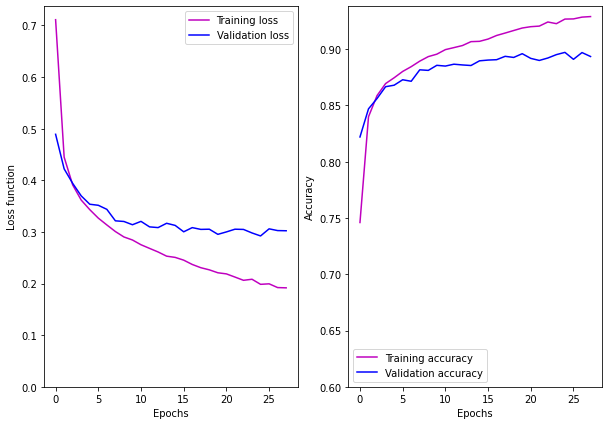

In [110]:
# plot training results (loss and accuracy vs epoch)
plt.figure(figsize=(10, 7))
plt.subplot(1,2,1)
plt.plot(history_cnn.history['loss'],color='m',label='Training loss')
plt.plot(history_cnn.history['val_loss'],color='b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.ylim(ymin = 0.0)
plt.legend()
plt.subplot(1,2,2)
plt.plot(history_cnn.history['accuracy'],color='m',label='Training accuracy')
plt.plot(history_cnn.history['val_accuracy'],color='b',label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(ymin = 0.6)
plt.legend()

In [111]:
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc_cnn)

313/313 - 1s - loss: 0.3159 - accuracy: 0.8950 - 666ms/epoch - 2ms/step

Test accuracy: 0.8949999809265137


In [112]:
probability_model_cnn = tf.keras.Sequential([model_cnn, tf.keras.layers.Softmax()])
predictions_cnn = probability_model_cnn.predict(test_images)

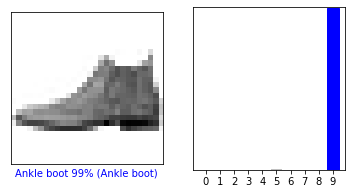

In [113]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_cnn[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_cnn[i],  test_labels)
plt.show()

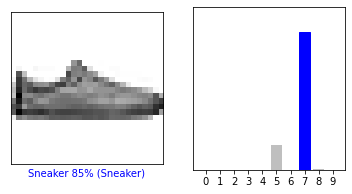

In [114]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_cnn[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_cnn[i],  test_labels)
plt.show()

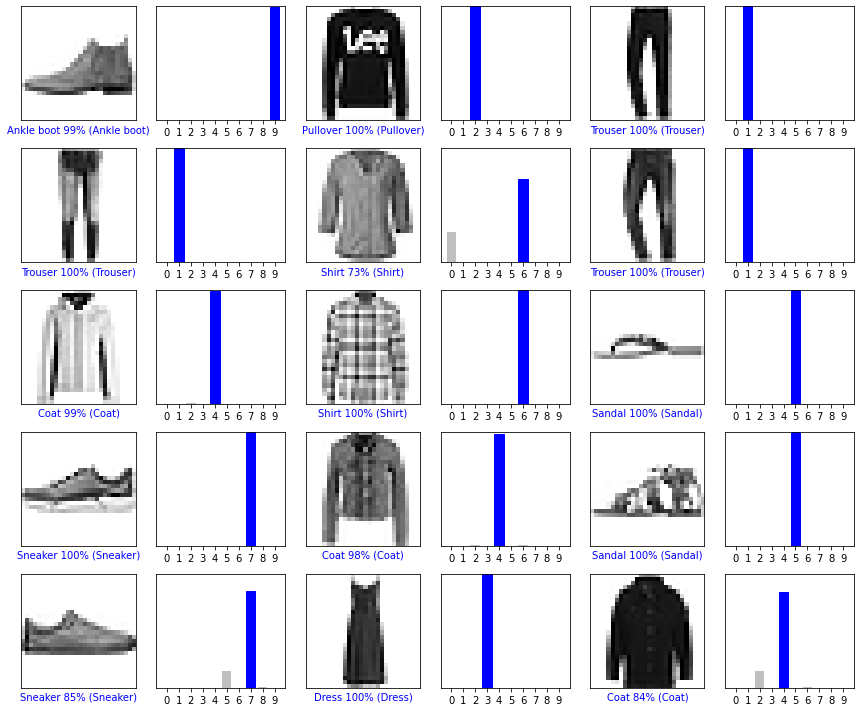

In [115]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions_cnn[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions_cnn[i], test_labels)
plt.tight_layout()
plt.show()